In [153]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [154]:
df1 = pd.read_csv('./data/Admission_Predict.csv')
df2 = pd.read_csv('./data/Admission_Predict_Ver1.1.csv')
# Combining the tow data files
full_df = df1.append(df2, ignore_index=True)

# Changing columns names
full_df.columns = ['serial_no', 'gre_score', 'toefl_score', 'uni_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']

# Drop unwanted column
full_df = full_df.drop(['serial_no'], axis=1)

full_df.head(5)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [155]:
full_df.describe()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [156]:
full_df.info()

# Get values from research column 
full_df['research'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gre_score        900 non-null    int64  
 1   toefl_score      900 non-null    int64  
 2   uni_rating       900 non-null    int64  
 3   sop              900 non-null    float64
 4   lor              900 non-null    float64
 5   cgpa             900 non-null    float64
 6   research         900 non-null    int64  
 7   chance_of_admit  900 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.4 KB


1    499
0    401
Name: research, dtype: int64

In [157]:
# Drop 98 of the rows where research=1 to get same portions
drop_indices = np.random.choice(full_df[full_df['research']==1].index, 98, replace=False)
full_df.drop(drop_indices, inplace=True)
full_df.reset_index(drop=True)

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,314,103,2,2.0,3.0,8.21,0,0.65
4,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...
797,332,108,5,4.5,4.0,9.02,1,0.87
798,337,117,5,5.0,5.0,9.87,1,0.96
799,330,120,5,4.5,5.0,9.56,1,0.93
800,312,103,4,4.0,5.0,8.43,0,0.73


In [158]:
print(full_df['research'].value_counts())

1    401
0    401
Name: research, dtype: int64


In [159]:
# Rescale all data values into values between 0-1
for col in full_df.columns:
    full_df['new_'+col] = (full_df[col]-full_df[col].min())/(full_df[col].max()-full_df[col].min())

In [160]:
# Drop old columns
full_df = full_df.drop(full_df.columns.to_series()['gre_score':'chance_of_admit'], axis=1)

full_df.head(5)

,new_gre_score,new_toefl_score,new_uni_rating,new_sop,new_lor,new_cgpa,new_research,new_chance_of_admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
5,0.80,0.821429,1.00,0.875,0.500,0.814103,1.0,0.888889


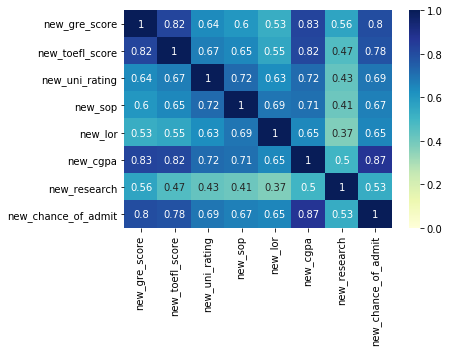

In [161]:
# Plot the correlation matrix
ax = sns.heatmap(full_df.corr(), annot=True,vmin=0, vmax=1 ,cmap='YlGnBu')

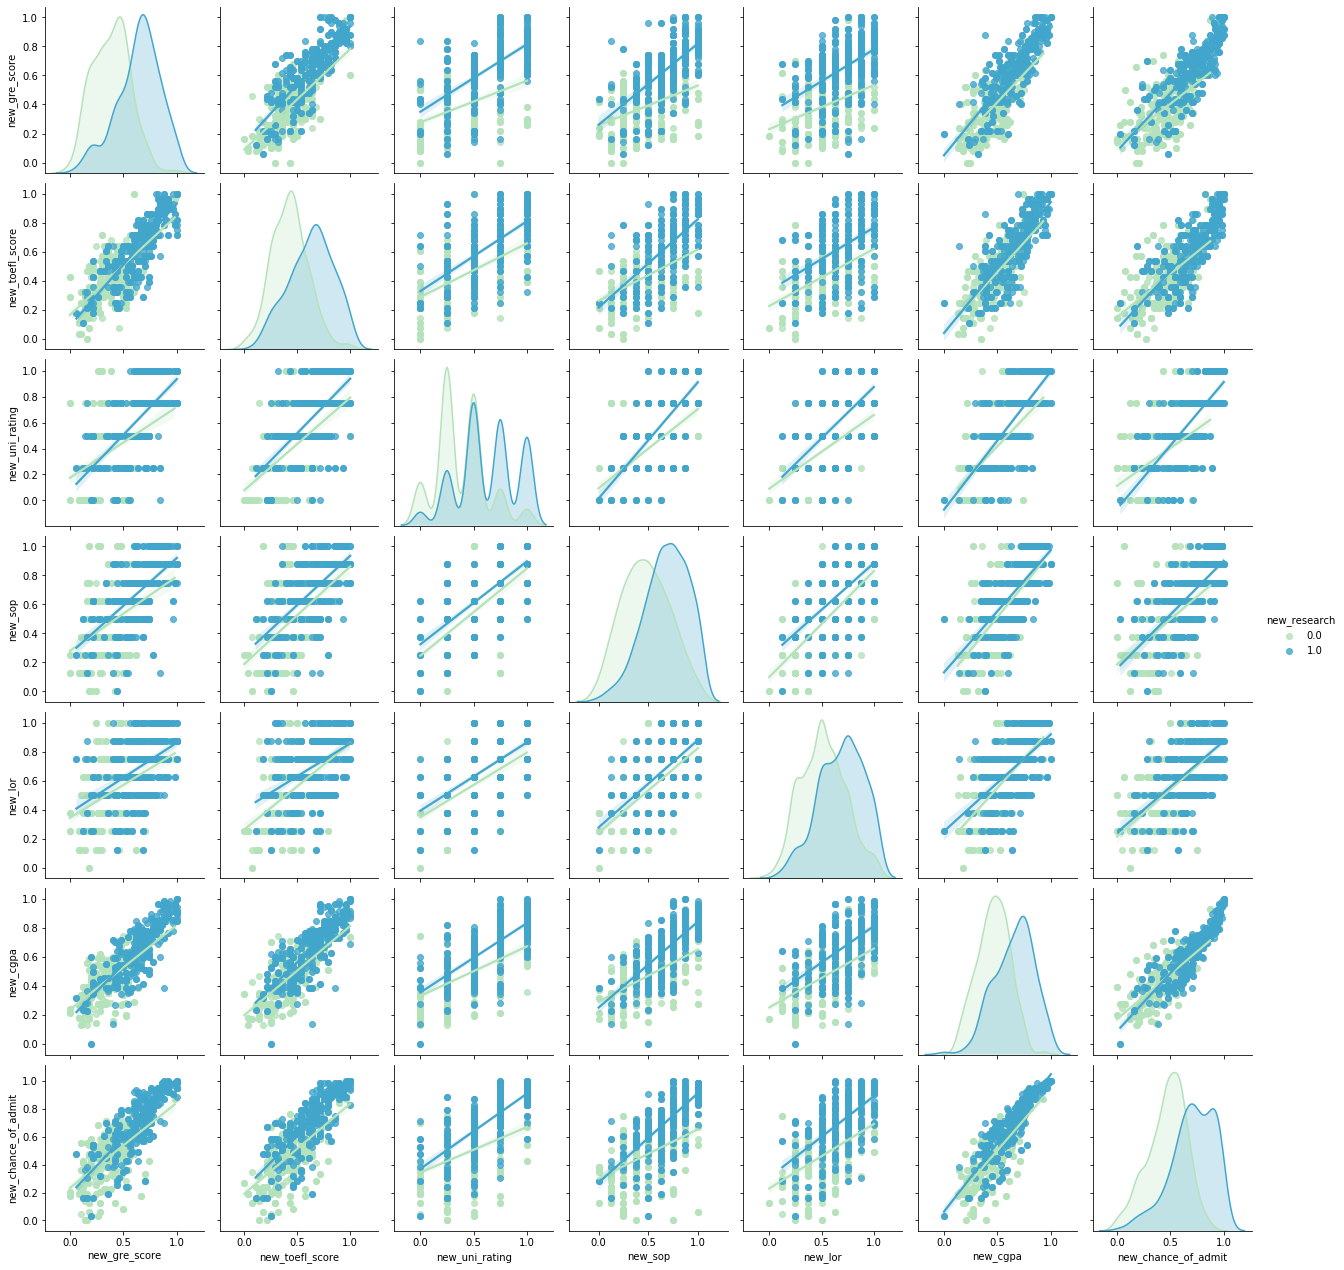

In [162]:
pair = sns.pairplot(full_df, hue="new_research", kind='reg', palette='GnBu')

In [163]:
# Create dummies for research column
full_df = pd.concat([full_df,pd.get_dummies(full_df['new_research'], prefix='research')],axis=1)
full_df = full_df.drop('new_research',axis = 1)

In [164]:
full_df.columns

Index(['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop',
       'new_lor', 'new_cgpa', 'new_chance_of_admit', 'research_0.0',
       'research_1.0'],
      dtype='object')

In [173]:
# Calculate the veriance inflation factor for multicollinearity
inputs = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop', 'new_lor', 'new_cgpa',
                  'research_0.0', 'research_1.0']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(inputs.values, i) for i in (range(inputs.shape[1]))]
vif["features"] = inputs.columns

In [174]:
vif.head(full_df.shape[1])

,VIF Factor,features
0,4.351033,new_gre_score
1,3.950153,new_toefl_score
2,2.667596,new_uni_rating
3,2.840474,new_sop
4,2.185731,new_lor
5,4.915342,new_cgpa
6,5.747067,research_0.0
7,9.969613,research_1.0


In [175]:
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_sop', 'new_lor', 'new_cgpa', 'research_0.0',
             'research_1.0']]
Y = full_df['new_chance_of_admit']

model = OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     new_chance_of_admit   R-squared:                       0.802
Model:                             OLS   Adj. R-squared:                  0.800
Method:                  Least Squares   F-statistic:                     458.3
Date:                 Wed, 08 Jul 2020   Prob (F-statistic):          7.37e-274
Time:                         14:21:37   Log-Likelihood:                 704.24
No. Observations:                  802   AIC:                            -1392.
Df Residuals:                      794   BIC:                            -1355.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
new_gre_score       0.1472      0.033      4.488      0.000       0.083       0.212
new_toefl_score     0.1221      0.033      3.706      0.000       0.057       0.187
new_uni_rating      0.0341      0.020      1.666      0.096      -0.006       0.074
new_sop            -0.0109      0.024     -0.453      0.650      -0.058       0.036
new_lor             0.1314      0.023      5.675      0.000       0.086       0.177
new_cgpa            0.5944      0.041     14.509      0.000       0.514       0.675
research_0.0        0.0088      0.012      0.730      0.466      -0.015       0.033
research_1.0        0.0434      0.016      2.725      0.007       0.012       0.075
==============================================================================
Omnibus:                      162.021   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.385
Skew:                          -1.121   Prob(JB):                     4.49e-75
Kurtosis:                       5.285   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# I removed `new_sop` and 'research_0.0' columns beacause of the high P value
X = full_df[['new_gre_score', 'new_toefl_score', 'new_uni_rating', 'new_lor', 'new_cgpa', 'research_1.0']]
Y = full_df['new_chance_of_admit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ", rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.09574511303869922
R-Squared Error: 0.8345881589194595
